   ## *Q&A Activity on Testing of Hypothesis*


###  *1. Carry out descriptive analytics on the dataset.*
### *2. Check whether female and male students scored the same marks.*
### *3. Whether test preparation helps the students*


### Data preparation

In [82]:
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")
# importing necessary packages
import pandas as pd
import numpy as np                     
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [83]:
test = pd.read_csv('Week_8_Q&A.csv')
test                                    # reading data in py environment

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


In [84]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [85]:
test.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [86]:
test.isnull().sum() #checking null values

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

The given dataset is about gender-wise performance of students in an institution.
Some of students have completed test preparation course. Performance of students who completed the test preparation course 
and others who haven't completed it are analysed here. There are no null values in the given set.

### *1. Carry out descriptive analytics on the dataset.*

In [87]:
test.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [88]:
test['Total Marks'].kurtosis()

-1.4021501341278384

In [89]:
test['Total Marks'].skew()

-0.2280260398992008

<AxesSubplot:xlabel='Total Marks', ylabel='Count'>

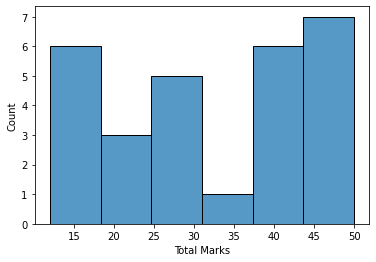

In [90]:
sns.histplot(data = test, x = "Total Marks")

<AxesSubplot:xlabel='Total Marks', ylabel='Density'>

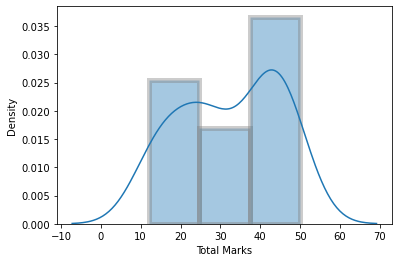

In [91]:
sns.distplot(test['Total Marks'],hist_kws=dict(edgecolor="grey",linewidth=5))

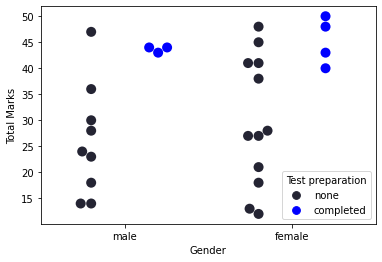

In [92]:
sns.swarmplot(x = "Gender", y = "Total Marks", hue = "Test preparation", data = test, color = "blue", size = 10, dodge = True)
plt.show()

Findings:
     
    • From statistical information, maximum and minimum score by students are 50 and 12 respectively.
    they score an average of 32 marks.
    
    • from histplot and distplot, most of the students scores between 44 to 50. Less no.of students score between 25 to 39.
    
    • from swarmplot, eventhough, most of the students didn't complete test preparation there is not much difference intheir 
      marks. Also female participation in the test is more than males.

### *2. Check whether female and male students scored the same marks.*

female    16
male      12
Name: Gender, dtype: int64

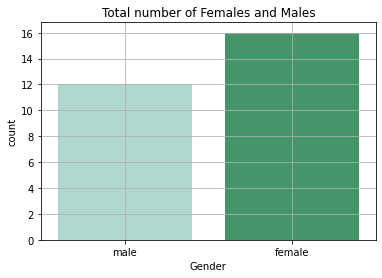

In [93]:
sns.countplot(test['Gender'],palette = 'BuGn')
plt.title('Total number of Females and Males', fontweight = 8)
plt.grid()

test['Gender'].value_counts()


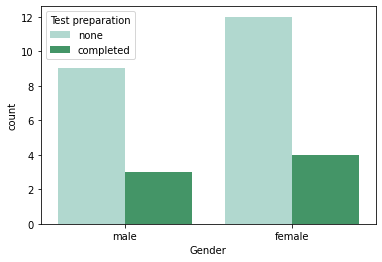

In [94]:
sns.countplot(x ='Gender', hue = "Test preparation", data = test, palette = "BuGn")
 
plt.show()

In [95]:
test.groupby('Gender')['Total Marks'].mean()

Gender
female    33.750000
male      30.416667
Name: Total Marks, dtype: float64

Findings: Average marks of females is slightly higher than males. we can say the marks scored by both are almost same.

### *3. Whether test preparation helps the students*

In [96]:
test['Test preparation'].value_counts()

none         21
completed     7
Name: Test preparation, dtype: int64

state hypothesis: 
    
    null hypothesis: test preparation helps the students score more marks.
        
    alternate hypothesis : test preparation have no effect on students marks.
        
state significance level as 0.05.
if p-value<0.05, we can reject  null hypothesis otherwise accept null hypothesis.

In [98]:
from statsmodels.stats import weightstats as stests    # calculating p-value by ztest  
ztest ,pval = stests.ztest(test['Total Marks'], x2=None, value=156)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


Here p-value is less than 0.05.

In [99]:
from scipy.stats import chi2_contingency
crosstab1 = pd.crosstab(test['Total Marks'], test['Test preparation'])
crosstab1

Test preparation,completed,none
Total Marks,,
12,0,1
13,0,1
14,0,2
18,0,2
21,0,1
23,0,1
24,0,1
27,0,2
28,0,2


In [100]:
stats.chi2_contingency(crosstab1) 

(25.33333333333333,
 0.1498602128509119,
 19,
 array([[0.25, 0.75],
        [0.25, 0.75],
        [0.5 , 1.5 ],
        [0.5 , 1.5 ],
        [0.25, 0.75],
        [0.25, 0.75],
        [0.25, 0.75],
        [0.5 , 1.5 ],
        [0.5 , 1.5 ],
        [0.25, 0.75],
        [0.25, 0.75],
        [0.25, 0.75],
        [0.25, 0.75],
        [0.5 , 1.5 ],
        [0.5 , 1.5 ],
        [0.5 , 1.5 ],
        [0.25, 0.75],
        [0.25, 0.75],
        [0.5 , 1.5 ],
        [0.25, 0.75]]))

In [101]:
from scipy import stats
import scipy.stats                                 # finding chi-square critical value and comparing with chi-square value founded earlier.
scipy.stats.chi2.ppf(0.05, 19)  

10.117013063859044

Findings:
    
chi-square value > chi-square critical value and p -value is less than significance value 0.05, 
so we are rejecting null hypothesis and accepting alternate hypothesis. 

Test preparation has no influence on students performance.